# Quaternion Rotation

## quaternion rotation:  
#### given vectors and angle:   
<pre>
vector: P = [px, py, pz],  (P should be normalized: P / |P|)  
unit vector (rotation axis): U = [ux, uy, uz],  (U should be normalized: U / |U|)  
rotation angle: θ  
</pre>
#### quaternion equations:   
<pre>
quaternion: P = [pw, px, py, pz]
quaternion: Q = [cos(θ/2), ux * sin(θ/2), uy * sin(θ/2), uz * sin(θ/2)]
quaternion: Q<sup>-1</sup> = [cos(θ/2), ux * sin(θ/2), uy * sin(θ/2), uz * sin(θ/2)]

quaternion multiplication: q1 * q2 = [q1w, q1x, q1y, q1z] * [q2w, q2x, q2y, q2z] 
                                   = [[q1w * q2w - q1x * q2x - q1y * q2y - q1z * q2z],
                                      [q1w * q2x + q1x * q2w + q1y * q2z - q1z * q2y],
                                      [q1w * q2y - q1x * q2z + q1y * q2w + q1z * q2x], 
                                      [q1w * q2z + q1x * q2y - q1y * q2x + q1z * q2w]]

quaternion rotation: [w, x, y, z] = Q * P * Q<sup>-1</sup>,  (use quaternion multiplication: (Q * P) * Q<sup>-1</sup>)
</pre>
#### a new vector after quaternion rotation:  
<pre>
vector: [x, y, z]
</pre>

## Quaternion rotation: Vector A with Unit vector and Rotation angle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [380]:
A = np.array([1, -1, 1])             # initial vector A (arbitary vector)
As = np.linalg.norm(A)               # scalar of A: |A|
An = A / As                          # normalization: should be (sum(x**2 + y**2 + z**2))**0.5 = 1.0

U  = np.array([-0.1, -0.9, 0.2])     # unit vector (not normalized)
Us = np.linalg.norm(U)               # scalar of U: |U|
UV = U / Us                          # unit vector (normalized)

# quaternion multiplication function
def QbyQ(q1, q2): # q = [w, x, y, z]
    w = q1[0]*q2[0] - q1[1]*q2[1] - q1[2]*q2[2] - q1[3]*q2[3]
    i = q1[0]*q2[1] + q1[1]*q2[0] + q1[2]*q2[3] - q1[3]*q2[2]
    j = q1[0]*q2[2] - q1[1]*q2[3] + q1[2]*q2[0] + q1[3]*q2[1]
    k = q1[0]*q2[3] + q1[1]*q2[2] - q1[2]*q2[1] + q1[3]*q2[0]
    return np.array([w, i, j, k])

# quaternion rotation function
def QPQc(P, UV, t): # P: quaternion, UV: unit vector, t: rotation angle theta
    q =  [np.cos(t/2),  UV[0] * np.sin(t/2),  UV[1] * np.sin(t/2),  UV[2] * np.sin(t/2)]
    qc = [np.cos(t/2), -UV[0] * np.sin(t/2), -UV[1] * np.sin(t/2), -UV[2] * np.sin(t/2)]
    qP = QbyQ(q, P)
    result = QbyQ(qP, qc)
    return result

QA = np.insert(An, 0, 0)    # quaternion of An: [0, x, y, z]
theta = np.deg2rad(45)      # rotation angle
QB = QPQc(QA, UV, theta)    # quaternion rotation for An with UV and theta
Bn = QB[1:]                 # vectorize the quaternion result
B = Bn * As                 # new vector as same scalar as initial vector A

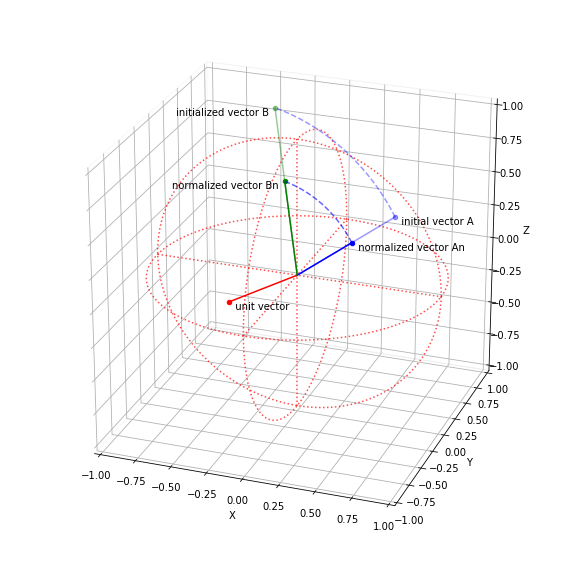

In [383]:
# plot 
def plot_base(elev=25, azim=-70):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.set(xlim=(-1, 1), ylim=(-1 ,1), zlim=(-1, 1))
    ax.set(xlabel='X', ylabel='Y', zlabel='Z')
    ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False

    t = np.linspace(0, 2*np.pi, 128+1)
    alpha = 0.7
    ax.plot(np.cos(t), np.sin(t), [0]*len(t), linestyle=':', c='red', alpha=alpha)
    ax.plot(np.cos(t), [0]*len(t), np.sin(t), linestyle=':', c='red', alpha=alpha)
    ax.plot([0]*len(t), np.cos(t), np.sin(t), linestyle=':', c='red', alpha=alpha)
    ax.plot([-1, 1], [0, 0], [0, 0], linestyle=':', c='red', alpha=alpha)
    ax.plot([0, 0], [-1, 1], [0, 0], linestyle=':', c='red', alpha=alpha)
    ax.plot([0, 0], [0, 0], [-1, 1], linestyle=':', c='red', alpha=alpha)
    return ax

ax = plot_base()
ax.plot([0, A[0]], [0, A[1]], [0, A[2]], c='b', alpha=0.4) # vector A
ax.scatter(A[0], A[1], A[2], c='b', alpha=0.4)
ax.text(A[0], A[1], A[2], s='  initial vector A', va='top')
ax.plot([0, An[0]], [0, An[1]], [0, An[2]], c='b')         # vector A normalized
ax.scatter(An[0], An[1], An[2], c='b')
ax.text(An[0], An[1], An[2], s='  normalized vector An', va='top')

ax.plot([0, UV[0]], [0, UV[1]], [0, UV[2]], c='r')         # unit vector
ax.scatter(UV[0], UV[1], UV[2], c='r')
ax.text(UV[0], UV[1], UV[2], s='  unit vector', va='top')

ax.plot([0, B[0]], [0, B[1]], [0, B[2]], c='g', alpha=0.4) # vector B
ax.text(B[0], B[1], B[2], s='initialized vector B  ', ha='right', va='top')
ax.scatter(B[0], B[1], B[2], c='g', alpha=0.4)
ax.plot([0, Bn[0]], [0, Bn[1]], [0, Bn[2]], c='g')         # vector B normalized
ax.scatter(Bn[0], Bn[1], Bn[2], c='g')
ax.text(Bn[0], Bn[1], Bn[2], s='normalized vector Bn  ', ha='right', va='top')

Arc = [QPQc(QA, UV, t) for t in np.linspace(0, theta, 33)] # arc between A and B
arw, arx, ary, arz = np.array(Arc).T
ax.plot(arx, ary, arz, linestyle='--', c='b', alpha=0.6)
ax.plot(arx*As, ary*As, arz*As, linestyle='--', c='b', alpha=0.4)

## Find Unit vector and Rotation angle from Two vectors

In [665]:
# find unit vector and rotation angle for two vectors A and B
A = np.array([1, -1, 0.2])           # start point A
As = np.linalg.norm(A)               # scalar of A: |A|
An = A / As                          # normalization

B = np.array([0.4, -0.1, 1.1])       # end point B
Bs = np.linalg.norm(B)               # scalar of B: |B|
Bn = B / Bs                          # normalization

# find unit vector for An-Bn rotation
AnxBn = np.cross(An, Bn)             # orthogonal vector to An-Bn
UV = AnxBn / np.linalg.norm(AnxBn)   # unit vector (normalized): rotation axis 

# find rotation angle about An-Bn
# cos_t = (An dot Bb) / (|An|*|Bn|)  # (|An|*|Bn|) = An * Bn = 1 * 1 = 1
cos_AnBn = np.dot(An, Bn)
theta_AnBn = np.arccos(cos_AnBn)     # angle between An and Bn

# reproduct A-B rotation
Qa = np.insert(An, 0, 0)             # quaternion of An: [0, x, y, z]
Qb = QPQc(Qa, UV, theta_AnBn)        # quaternion rotation for An with UV and theta_AB
Bn_new = Qb[1:]                      # new Bn vector (normalized): [bx, by, bz]
B_new = Bn_new * Bs                  # new B vector

print('unit vector:', UV)
print('theta (degrees):', np.rad2deg(theta_AnBn))
print('initial vector B:', B)
print('new vector B    :', B_new) 

unit vector: [-0.71262682 -0.67303645  0.1979519 ]
theta (degrees): 64.5883294834531
initial vector B: [ 0.4 -0.1  1.1]
new vector B    : [ 0.4 -0.1  1.1]


In [666]:
# interactive plot with ipywidgets
from ipywidgets import interact
%matplotlib inline

steps = 33
Arc = np.array([QPQc(Qa, UV, t) for t in np.linspace(0, theta_AnBn, steps)]).T # arc An-Bn
_, arx, ary, arz = Arc
ABs = np.linspace(As, Bs, steps) # scalar transition from A to B
ABx = arx * ABs                   # x term for arc A-B
ABy = ary * ABs                   # y term for arc A-B
ABz = arz * ABs                   # z term for arc A-B

@interact(idx=(0, steps-1, 1), elev=(0, 180, 1), azim=(-180, 180, 1))
def two_vec(idx=10, elev=25, azim=96):
    ax = plot_base(elev, -azim)

    ax.plot([0, A[0]], [0, A[1]], [0, A[2]], c='b', alpha=0.4)   # vector A
    ax.scatter(A[0], A[1], A[2], c='b', alpha=0.4)               # point A
    ax.text(A[0], A[1], A[2], s='  initial vector A')
    ax.plot([0, An[0]], [0, An[1]], [0, An[2]], c='b')           # vector An
    ax.scatter(An[0], An[1], An[2], c='b')                       # point An
    ax.text(An[0], An[1], An[2], s='normalized vector An  ', ha='right', va='top')

    ax.plot([0, UV[0]], [0, UV[1]], [0, UV[2]], c='r')           # unit vector
    ax.scatter(UV[0], UV[1], UV[2], c='r')
    ax.text(UV[0], UV[1], UV[2], s='unit vector  ', ha='right', va='top')

    ax.plot([0, B[0]], [0, B[1]], [0, B[2]], c='g', alpha=0.4)    # vector B
    ax.text(B[0], B[1], B[2], s='initialized vector B  ', ha='right', va='center')
    ax.scatter(B[0], B[1], B[2], c='g', alpha=0.4)                # vector B
    ax.plot([0, Bn[0]], [0, Bn[1]], [0, Bn[2]], c='g')            # vector Bn
    ax.scatter(Bn[0], Bn[1], Bn[2], c='g')                        # vector Bn
    ax.text(Bn[0], Bn[1], Bn[2], s='normalized vector Bn  ', ha='right', va='center')
    
    ax.plot([0, arx[idx]], [0, ary[idx]], [0, arz[idx]], color='magenta')           # vector An (move)
    ax.plot([0, arx[idx]*As], [0, ary[idx]*As], [0, arz[idx]*As], c='m', alpha=0.4) # move A    (move)
    ax.scatter(arx[idx]*As, ary[idx]*As, arz[idx]*As, c='m', alpha=0.4)             # point A   (move)
    ax.scatter(arx[idx], ary[idx], arz[idx], c='m')                                 # point An  (move)
    ax.plot(arx[:idx+1], ary[:idx+1], arz[:idx+1], linestyle='--', c='b', alpha=0.7)   # arc An-Bn
    ax.plot(arx[:idx+1]*As, ary[:idx+1]*As, arz[:idx+1]*As, ls='--', c='b', alpha=0.7) # arc A-A
    rate = As + (Bs - As) * idx / steps
    ax.scatter(arx[idx]*rate, ary[idx]*rate, arz[idx]*rate, c='m')                  # point A-B
    ax.plot(ABx[:idx+1], ABy[:idx+1], ABz[:idx+1], ls='--', c='m', alpha=0.9)       # arc A-B

interactive(children=(IntSlider(value=10, description='idx', max=32), IntSlider(value=25, description='elev', …

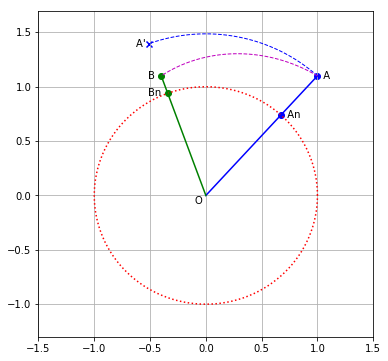

In [6]:
# 2D explanation diagram
case = False

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.axis([-1.5, 1.5, -1.3, 1.7], 'equal')
ax.grid()
t = np.linspace(0, np.pi*2, 129)
ax.plot(np.cos(t), np.sin(t), 'r:')
ax.text(0,0, s='O ', va='top', ha='right')
A = [1.0, 1.1]
B = [-0.4, 1.1]
As = np.linalg.norm(A)
Bs = np.linalg.norm(B)
An = np.array(A) / As
Bn = np.array(B) / Bs

ax.plot([0, A[0]], [0, A[1]], c='b')                       # A-O
ax.scatter(A[0], A[1], c='b')                              # A
ax.text(A[0], A[1], s='  A', va='center')                  # A  text
ax.scatter(An[0], An[1], c='b')                            # An
ax.text(An[0], An[1], s='  An', va='center')               # An text

ax.plot([0, B[0]], [0, B[1]], c='g')                       # B-O
ax.scatter(Bn[0], Bn[1], c='g')                            # Bn
ax.text(Bn[0], Bn[1], s='Bn  ', ha='right', va='center')   # Bn text

if case:
    ax.plot([0, Bn[0]*As], [0, Bn[1]*As], c='g')              # B as same scaler as A
    ax.scatter(Bn[0]*As, Bn[1]*As, c='g')
    ax.text(Bn[0]*As, Bn[1]*As, s='B  ', ha='right', va='center')
else:
    ax.scatter(B[0], B[1], c='g')                              # B
    ax.text(B[0], B[1], s='B  ', ha='right', va='center')      # B  text
    rad_An = np.arccos(An[0])
    rad_Bn = np.arccos(Bn[0])
    t = np.linspace(rad_An, rad_Bn, 33)
    ax.plot(As*np.cos(t), As*np.sin(t), c='b', ls='--', lw=1)      # arc A-A'
    ax.scatter(Bn[0]*As, Bn[1]*As, marker='x', c='b')              # A' x marker
    ax.text(Bn[0]*As, Bn[1]*As, s='A\' ', ha='right', va='center') # A'  text
    ABs = np.linspace(As, Bs, 33)
    ax.plot(ABs*np.cos(t), ABs*np.sin(t), c='m', ls='--', lw=1)    # arc A-B